In [1]:
%pylab inline
import networkx as nx
from pyoslom import OSLOM

Populating the interactive namespace from numpy and matplotlib


In [2]:
#help(OSLOM)

In [3]:
G = nx.read_pajek("example.pajek")

In [4]:
alg=OSLOM(random_state=123)
results = alg.fit_transform(G)

Running ['oslom_undir', '-w', '-seed', '123', '-f', 'edges.txt']


In [5]:
def print_clus(clus):
    for k, v in clus.items():
        if k != 'clusters':
            print(str(k) + "=" + str(v))
    for k, l in clus['clusters'].items():
        print("Level:" + str(k) + ", #clu=" + str(len(l)))

print_clus(results)

multilevel=True
num_level=2
max_level=1
params=['oslom_undir', '-w', '-seed', 123]
Level:0, #clu=9
Level:1, #clu=3


In [6]:
from collections import defaultdict
cmap = plt.cm.get_cmap('plasma')
def color_maps(n, i):
    norm = matplotlib.colors.Normalize(vmin=0, vmax=n)
    return norm(i)

def make_colors(clu):
    node_colors={}
    for i,l in clu.items():
        for n in l:
            node_colors[str(n)]=i
    tmp=[color_maps(len(clu), node_colors[u]) for u in G.nodes]
    return [cmap(x) for x in tmp]
def make_edge_colors(clu):
    colors=defaultdict(lambda: defaultdict(lambda: (0.0, 0.0, 0.0, 1.0)))
    for i,l in clu.items():
        c=cmap(color_maps(len(clu),i))
        for n1 in l:
            for n2 in l:
                colors[str(n1)][str(n2)]=c
    
    return  [colors[u][v] for u,v,_ in G.edges]



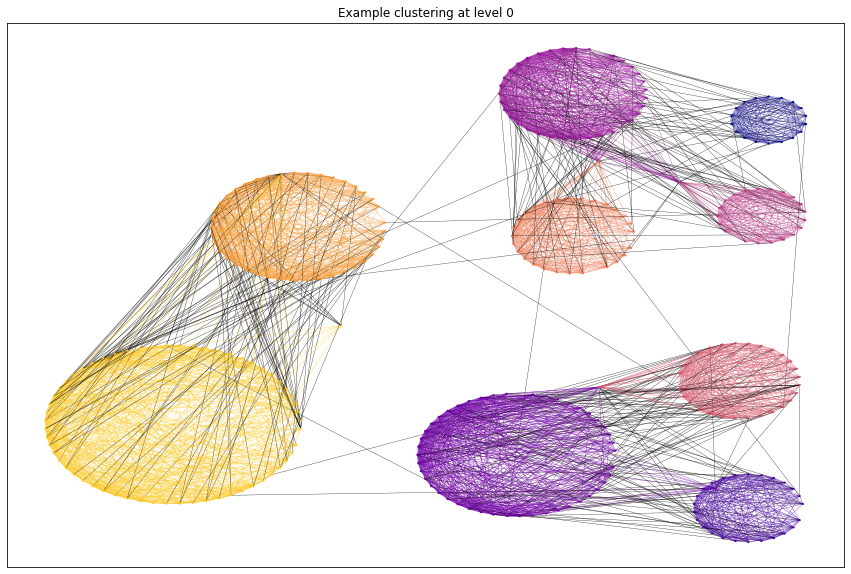

In [7]:
clu=results['clusters'][0]

plt.figure(figsize=(15,10))
posx=nx.get_node_attributes(G,'x')
posy=nx.get_node_attributes(G,'y')
pos={}
for k in posx:
    pos[k]=(posx[k],posy[k])
plt.title("Example clustering at level 0")
nx.draw_networkx_nodes(G, node_size=1, pos=pos, node_color=make_colors(clu))       
nx.draw_networkx_edges(G, pos=pos, width=0.3, edge_color=make_edge_colors(clu))
 

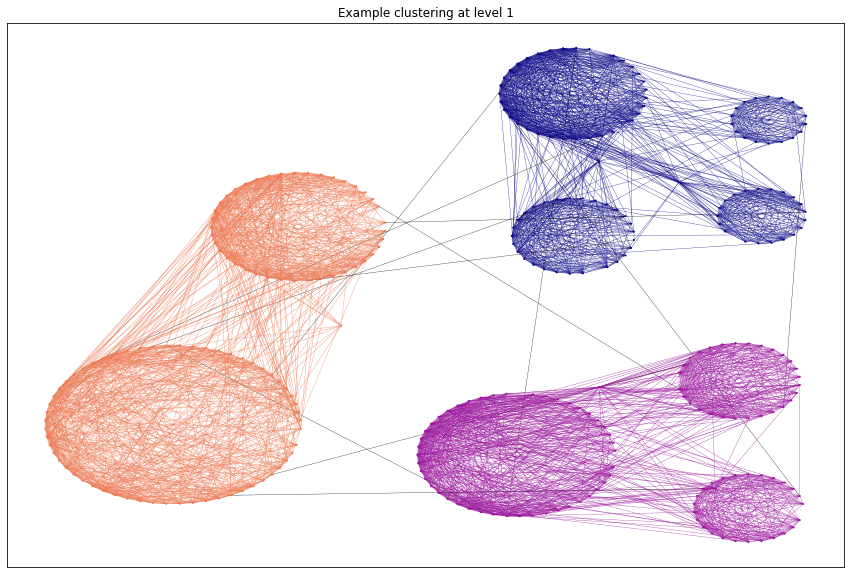

In [8]:
clu=results['clusters'][1]

plt.figure(figsize=(15,10))
posx=nx.get_node_attributes(G,'x')
posy=nx.get_node_attributes(G,'y')
pos={}
for k in posx:
    pos[k]=(posx[k],posy[k])
plt.title("Example clustering at level 1")
nx.draw_networkx_nodes(G, node_size=1, pos=pos, node_color=make_colors(clu))       
nx.draw_networkx_edges(G, pos=pos, width=0.3, edge_color=make_edge_colors(clu))
 